In [110]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [111]:
# import dataset
user_profile = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical_Non_Unique.csv")
user_profile

,Unnamed: 0,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
0,0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
1,1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
2,2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
3,3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
4,4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2589,2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2590,2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2591,2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625,LOW


In [112]:
user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2593 non-null   int64  
 1   Phone_Number.hash         2593 non-null   object 
 2   Peo_TV_Package            2593 non-null   object 
 3   usage_08_20 (hh:mm)       2593 non-null   float64
 4   usage_07_20 (hh:mm)       2593 non-null   float64
 5   usage_06_20 (hh:mm)       2593 non-null   float64
 6   usage_05_20 (hh:mm)       2593 non-null   float64
 7   usage04_20 (hh:mm)        2593 non-null   float64
 8   usage_03_20 (hh:mm)       2593 non-null   float64
 9   usage_02_20 (hh:mm)       2593 non-null   float64
 10  usage_01_20 (hh:mm)       2593 non-null   float64
 11                            2593 non-null   object 
 12  Usage_Rating_Scaled       2593 non-null   float64
 13  Usage_Rating_Categorical  2593 non-null   object 
dtypes: float

In [113]:
data=user_profile.iloc[:,[1,2,12]]
data

,Phone_Number.hash,Peo_TV_Package,Usage_Rating_Scaled
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75000
...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75000
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.15625


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phone_Number.hash    2593 non-null   object 
 1   Peo_TV_Package       2593 non-null   object 
 2   Usage_Rating_Scaled  2593 non-null   float64
dtypes: float64(1), object(2)
memory usage: 60.9+ KB


In [115]:
# total number of unique users
data['Phone_Number.hash'].nunique()


1428

In [116]:
# total number of unique peo tv package
data['Peo_TV_Package'].nunique()


22

## Interaction Matrix

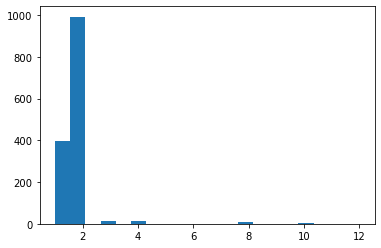

In [117]:
# create a histogram of all the interactions by all the users present in the dataset
interactions = data.groupby('Phone_Number.hash').count()['Peo_TV_Package']
plt.hist(interactions,bins=20)
plt.show()

In [118]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="Phone_Number.hash", columns="Peo_TV_Package", values="Usage_Rating_Scaled",aggfunc=np.sum)

In [119]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 00567a4a3c474aca1ce5cd6570648932 to fff2221d1365d22d2d08285f2b9fd303
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BOC                          5 non-null      float64
 1   DOUBLEPROMO                  2 non-null      float64
 2   LEISURE_SPORTS               1 non-null      float64
 3   LOTUS                        2 non-null      float64
 4   NEW_SLT_STAFF_PACKAGE        9 non-null      float64
 5   NEW_YEAR_TREAT               6 non-null      float64
 6   PEO_ENTERTAINMENT            18 non-null     float64
 7   PEO_FAMILY                   1 non-null      float64
 8   PEO_GOLD                     6 non-null      float64
 9   PEO_PLATINUM                 4 non-null      float64
 10  PEO_RELIGIOUS_PACKAGE        4 non-null      float64
 11  PEO_SILVER                   995 non-null    float64
 12  PEO_SILVER_FTTH       

In [120]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [121]:
interactions_metrix.sample(n=10)

Peo_TV_Package,BOC,DOUBLEPROMO,LEISURE_SPORTS,LOTUS,NEW_SLT_STAFF_PACKAGE,NEW_YEAR_TREAT,PEO_ENTERTAINMENT,PEO_FAMILY,PEO_GOLD,PEO_PLATINUM,...,PEO_SILVER_FTTH,PEO_SILVER_PLUS,PEO_SILVER_PLUS_FTTH,PEO_TITANIUM,PEO_UNNATHAM,PEO_UTHAYAM,PRANAMA,SLTStaff_PEO_SILVER,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY
Phone_Number.hash,,,,,,,,,,,,,,,,,,,,,
6f842d21b455923e081bfb8af4f68062,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,2.000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0
de4a1fdf1880db54d5176095a99ed2ab,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0
0c60a9f492b6b85359abd41c6ed29719,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.6875,0.0000,0.0,0.0,0.0
282a5805478d0a54e6d47804a51856f0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0
c467af816ea1d351225695b9abeaea09,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0
f730a3b752eb66aa8c9b50a5d2baf89a,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,1.5000,0.0,0.0,0.0
313c6deac83fed20faab9c4b98eb568b,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,1.4375,0.0,0.0,0.0
77cf90ebaec238d99aedf09bb839bca1,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0000,1.8125,0.0,0.0,0.0
acb74f0a36dd8628eca56b36daa1e186,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.0,1.375,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0


In [122]:
reader = Reader(rating_scale=(0, 1))
data_model = Dataset.load_from_df(data, reader)

In [123]:
trainset, testset = train_test_split(data_model, test_size=.20)

## Collabarative Recoomenders with Surprise

In [124]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


### SVD recommender

In [125]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3207  0.3228  0.3273  0.3287  0.3196  0.3238  0.0036  
MAE (testset)     0.2786  0.2809  0.2907  0.2853  0.2785  0.2828  0.0047  
Fit time          0.24    0.20    0.25    0.23    0.27    0.24    0.02    
Test time         0.01    0.01    0.01    0.01    0.02    0.01    0.00    


In [126]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [127]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [128]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
489,43789fc3039794b4f25ca5f027d6f8e2,PEO_SILVER,0.50000,0.500104,{'was_impossible': False},0,1454,0.000104
166,43789fc3039794b4f25ca5f027d6f8e2,PEO_SILVER,0.50000,0.500104,{'was_impossible': False},0,1454,0.000104
136,470410d22544dd5bf6bb9f1bdd927d1f,PEO_UTHAYAM,0.56250,0.564199,{'was_impossible': False},0,232,0.001699
508,470410d22544dd5bf6bb9f1bdd927d1f,PEO_UTHAYAM,0.56250,0.564199,{'was_impossible': False},0,232,0.001699
344,9533bde8a53baae028673acce9b1ef6e,PRANAMA,0.71875,0.723952,{'was_impossible': False},1,101,0.005202
247,52f1551b7a98fcb8c25e3d638dc826ab,PEO_SILVER,0.43750,0.429647,{'was_impossible': False},3,1454,0.007853
254,7656cf707af47d49fc5daeb45ee70e74,PEO_SILVER_PLUS,0.65625,0.645452,{'was_impossible': False},1,82,0.010798
182,bf371f3e687b8243f218e60641a41e07,PEO_SILVER,0.59375,0.581036,{'was_impossible': False},1,1454,0.012714
137,92ae17a4f2db240f44c1add400885c65,PEO_UTHAYAM,0.65625,0.642656,{'was_impossible': False},1,232,0.013594
242,2b83526c978eaef8d6c9fe24cb75fcd2,PEO_SILVER,0.50000,0.515496,{'was_impossible': False},1,1454,0.015496


In [129]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.3330
RMSE --> 0.3330365724942564
Accuracy --> 0.6669634275057437


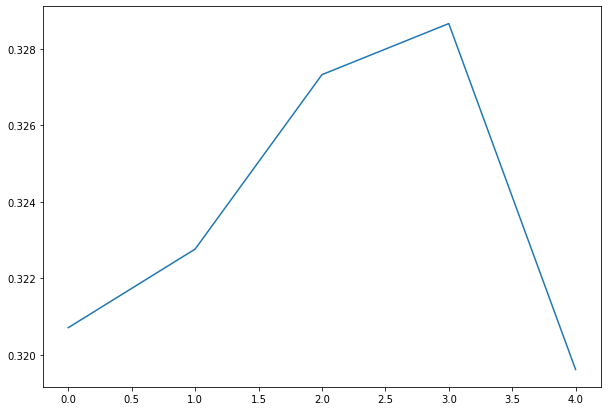

In [130]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### SlopeOne recommender

In [150]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
validate =cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2158  0.2329  0.2213  0.2134  0.2194  0.2206  0.0068  
MAE (testset)     0.1062  0.1244  0.1122  0.1051  0.1110  0.1118  0.0069  
Fit time          0.02    0.03    0.03    0.04    0.02    0.03    0.01    
Test time         0.00    0.00    0.01    0.00    0.00    0.01    0.00    


In [151]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

In [152]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [153]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,c5eefe86870a9bffac7af616670d72e5,PEO_SILVER,0.31250,0.31250,{'was_impossible': False},1,1454,0.0
326,7716ffcd7692c1c0d4f3f40be2eaf152,PEO_SILVER,0.78125,0.78125,{'was_impossible': False},3,1454,0.0
324,e494abb3b34e4c4b451efb968110aecf,PRANAMA,0.75000,0.75000,{'was_impossible': False},1,101,0.0
322,0682ffd5c8d3e62febf752b6cdbced3a,PEO_SILVER,1.00000,1.00000,{'was_impossible': False},1,1454,0.0
319,cddbdb4493830e40c0a31969034da7db,PEO_SILVER_PLUS,0.84375,0.84375,{'was_impossible': False},1,82,0.0
318,27a177845a558d6fdd460646bf079bcb,PEO_SILVER,0.46875,0.46875,{'was_impossible': False},1,1454,0.0
316,b0c0f50e69ed2111ea1109183599acc3,PEO_SILVER,1.00000,1.00000,{'was_impossible': False},1,1454,0.0
314,30f3ce3b22175582f6881911c8b5c9ff,PEO_SILVER,0.96875,0.96875,{'was_impossible': False},1,1454,0.0
313,6aa0beeb0226622462e95030241f2d45,PEO_SILVER,0.59375,0.59375,{'was_impossible': False},3,1454,0.0
311,902bacdcb17c3bd7881091f413c8b635,PEO_UTHAYAM,0.00000,0.00000,{'was_impossible': False},3,232,0.0


In [154]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2276
RMSE --> 0.2276278561449686
Accuracy --> 0.7723721438550314


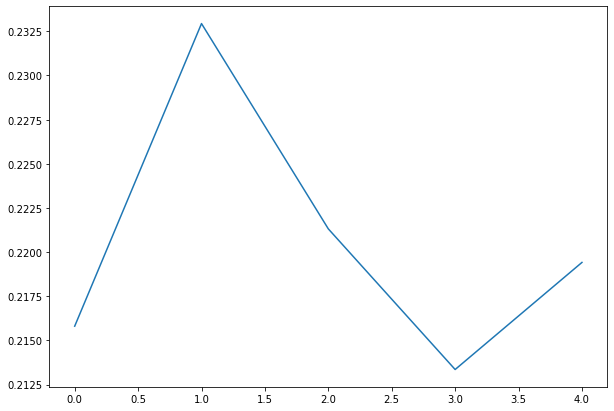

In [155]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### KNN with Means recommender

In [144]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2100  0.2307  0.2154  0.2244  0.2090  0.2179  0.0084  
MAE (testset)     0.1043  0.1171  0.1062  0.1157  0.1000  0.1087  0.0066  
Fit time          0.40    0.24    0.12    0.27    0.25    0.26    0.09    
Test time         1.39    0.64    0.99    0.61    0.84    0.89    0.28    


In [145]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [146]:
# Let's build a pandas dataframe with all the predictions
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [147]:
# 10 Best predictions
best_predictions = df.sort_values(by='err')[:10]
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
0,c5eefe86870a9bffac7af616670d72e5,PEO_SILVER,0.31250,0.31250,"{'actual_k': 40, 'was_impossible': False}",1,1454,0.0
326,7716ffcd7692c1c0d4f3f40be2eaf152,PEO_SILVER,0.78125,0.78125,"{'actual_k': 40, 'was_impossible': False}",3,1454,0.0
324,e494abb3b34e4c4b451efb968110aecf,PRANAMA,0.75000,0.75000,"{'actual_k': 40, 'was_impossible': False}",1,101,0.0
322,0682ffd5c8d3e62febf752b6cdbced3a,PEO_SILVER,1.00000,1.00000,"{'actual_k': 40, 'was_impossible': False}",1,1454,0.0
319,cddbdb4493830e40c0a31969034da7db,PEO_SILVER_PLUS,0.84375,0.84375,"{'actual_k': 40, 'was_impossible': False}",1,82,0.0
318,27a177845a558d6fdd460646bf079bcb,PEO_SILVER,0.46875,0.46875,"{'actual_k': 40, 'was_impossible': False}",1,1454,0.0
316,b0c0f50e69ed2111ea1109183599acc3,PEO_SILVER,1.00000,1.00000,"{'actual_k': 40, 'was_impossible': False}",1,1454,0.0
314,30f3ce3b22175582f6881911c8b5c9ff,PEO_SILVER,0.96875,0.96875,"{'actual_k': 40, 'was_impossible': False}",1,1454,0.0
313,6aa0beeb0226622462e95030241f2d45,PEO_SILVER,0.59375,0.59375,"{'actual_k': 40, 'was_impossible': False}",3,1454,0.0
311,902bacdcb17c3bd7881091f413c8b635,PEO_UTHAYAM,0.00000,0.00000,"{'actual_k': 40, 'was_impossible': False}",3,232,0.0


In [148]:
rmse = accuracy.rmse(predictions)
print("RMSE -->",rmse)
print("Accuracy -->",1-rmse)

RMSE: 0.2276
RMSE --> 0.2276278561449686
Accuracy --> 0.7723721438550314


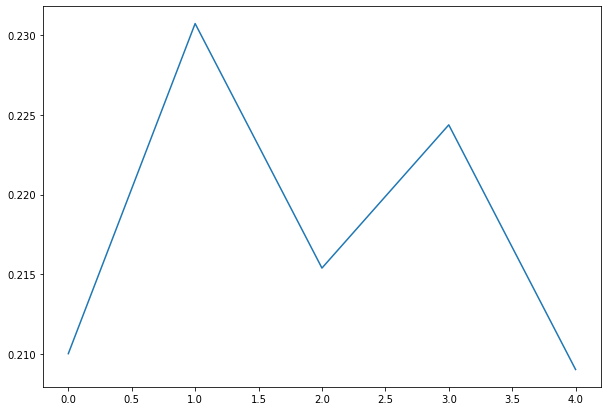

In [149]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### Benchmark algorithms

In [143]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SlopeOne,0.244347,0.046816,0.030958
KNNWithMeans,0.249523,0.194192,0.837513
KNNBaseline,0.255862,0.173760,1.205763
SVD,0.327715,0.193441,0.010915
BaselineOnly,0.348049,0.004045,0.004484
CoClustering,0.506377,0.362434,0.017159
